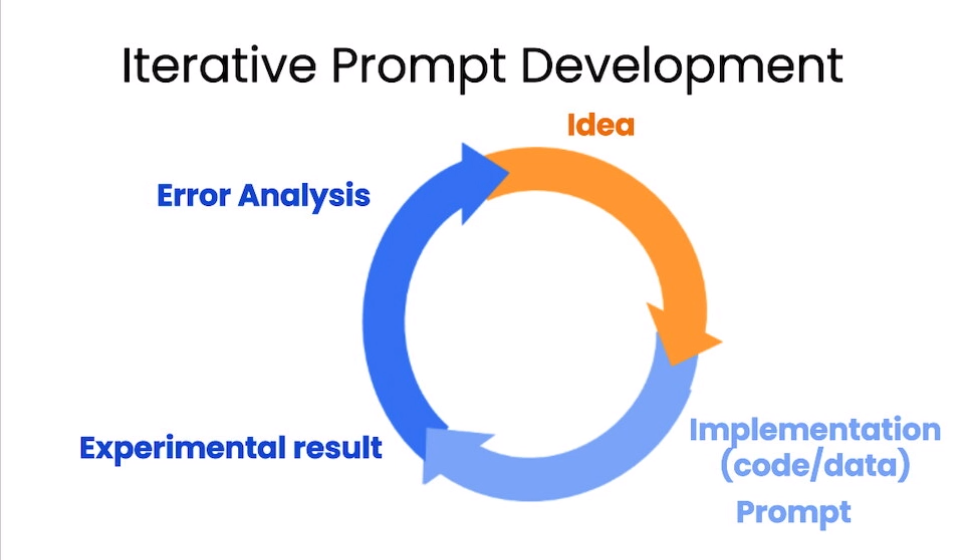

In [1]:
import openai
import key

openai.api_key  = key.openai_key
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

#### Prompting Guidelines:
- Be Clear and Specific in providing prompts
- Analyze why result doesn't give desired output
- Refine the idea and the prompt
- Repeat

#### Q. Generate a marketing product description from a product fact sheet

In [2]:
fact_sheet_chair = """
OVERVIEW
- Part of a beautiful family of mid-century inspired office furniture, 
including filing cabinets, desks, bookcases, meeting tables, and more.
- Several options of shell color and base finishes.
- Available with plastic back and front upholstery (SWC-100) 
or full upholstery (SWC-110) in 10 fabric and 6 leather options.
- Base finish options are: stainless steel, matte black, 
gloss white, or chrome.
- Chair is available with or without armrests.
- Suitable for home or business settings.
- Qualified for contract use.

CONSTRUCTION
- 5-wheel plastic coated aluminum base.
- Pneumatic chair adjust for easy raise/lower action.

DIMENSIONS
- WIDTH 53 CM | 20.87”
- DEPTH 51 CM | 20.08”
- HEIGHT 80 CM | 31.50”
- SEAT HEIGHT 44 CM | 17.32”
- SEAT DEPTH 41 CM | 16.14”

OPTIONS
- Soft or hard-floor caster options.
- Two choices of seat foam densities: 
 medium (1.8 lb/ft3) or high (2.8 lb/ft3)
- Armless or 8 position PU armrests 

MATERIALS
SHELL BASE GLIDER
- Cast Aluminum with modified nylon PA6/PA66 coating.
- Shell thickness: 10 mm.
SEAT
- HD36 foam

COUNTRY OF ORIGIN
- Italy
"""

In [3]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

Introducing our stunning mid-century inspired office chair, the perfect addition to any home or business setting. This chair is part of a beautiful family of office furniture, including filing cabinets, desks, bookcases, meeting tables, and more, all designed with a timeless mid-century aesthetic.

One of the standout features of this chair is the variety of customization options available. You can choose from several shell colors and base finishes to perfectly match your existing decor. The chair is available with either plastic back and front upholstery or full upholstery in a range of 10 fabric and 6 leather options, allowing you to create a look that is uniquely yours.

The chair is also available with or without armrests, giving you the flexibility to choose the option that best suits your needs. The base finish options include stainless steel, matte black, gloss white, or chrome, ensuring that you can find the perfect match for your space.

In terms of construction, this chair is

##### Issue 1: The text is too long
- Limit the number of words/sentences/characters.

In [8]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response_1 = get_completion(prompt)
print(response_1)


Introducing our mid-century inspired office chair, part of a stunning furniture collection. With various color and finish options, choose between plastic or full upholstery in fabric or leather. The chair features a durable aluminum base with 5 wheels and pneumatic height adjustment. Perfect for home or business use. Made in Italy.


In [10]:
len(response_1.split(" "))

51

##### Issue 2. Text focuses on the wrong details
- Ask it to focus on the aspects that are relevant to the intended audience.

In [11]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

Introducing our mid-century inspired office chair, part of a beautiful furniture collection. With various shell colors and base finishes, it offers versatility for any setting. Choose between plastic or full upholstery in a range of fabric and leather options. The chair features a durable aluminum base and pneumatic chair adjustment for easy height customization. Made in Italy.


In [12]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

At the end of the description, include every 7-character 
Product ID in the technical specification.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

Introducing our mid-century inspired office chair, part of a beautiful family of furniture. This chair offers a range of options, including different shell colors and base finishes. Choose between plastic or full upholstery in various fabric and leather options. The chair is constructed with a 5-wheel plastic coated aluminum base and features a pneumatic chair adjust for easy raise/lower action. With its sleek design and multiple customization options, this chair is suitable for both home and business settings. Made in Italy.

Product IDs: SWC-100, SWC-110


##### Issue 3. Description needs a table of dimensions
- Ask it to extract information and organize it in a table.

In [13]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

At the end of the description, include every 7-character 
Product ID in the technical specification.

After the description, include a table that gives the 
product's dimensions. The table should have two columns.
In the first column include the name of the dimension. 
In the second column include the measurements in inches only.

Give the table the title 'Product Dimensions'.

Format everything as HTML that can be used in a website. 
Place the description in a <div> element.

Technical specifications: ```{fact_sheet_chair}```
"""

response = get_completion(prompt)
print(response)

<div>
  <h2>Product Description</h2>
  <p>
    Introducing our latest addition to our mid-century inspired office furniture collection - the SWC Chair. This chair is part of a beautiful family of furniture that includes filing cabinets, desks, bookcases, meeting tables, and more. With its sleek design and customizable options, the SWC Chair is the perfect choice for any home or business setting.
  </p>
  <p>
    The SWC Chair is available in several options of shell color and base finishes, allowing you to create a look that matches your style. You can choose between plastic back and front upholstery or full upholstery in a variety of fabric and leather options. The base finish options include stainless steel, matte black, gloss white, or chrome. Additionally, you have the choice of having the chair with or without armrests.
  </p>
  <p>
    Constructed with durability in mind, the SWC Chair features a 5-wheel plastic coated aluminum base, ensuring stability and easy mobility. The chai

#### Load Python libraries to view HTML

In [14]:
from IPython.display import display, HTML

In [15]:
display(HTML(response))

Dimension,Measurement (inches)
Width,"20.87"""
Depth,"20.08"""
Height,"31.50"""
Seat Height,"17.32"""
Seat Depth,"16.14"""


#### Iterative Process: 
- Try Something
- Analyse where and why the result doesn't give result as you expect
- Clarify the instructions, give more time to think